## Download and Format Images 

Decide below which "concepts" to include. These are the classes you want to be able to identify.

In [2]:
concepts_to_include = [
    "Asteroidea",
    "Ophiuroidea",
]

In [3]:
# Download the images from the fathomnet database
import os

data_directory = os.path.join('datasets', 'sea_data')

#!fathomnet-generate -c '{', '.join(concepts_to_include)}' --format voc --img-download "{os.path.join(data_directory, 'images')}" --output "{os.path.join(data_directory, 'labels')}"

In [4]:
# Build YAML
# This is what YOLO uses to route to its data and read the txt files' labeling

!pip install pyyaml
import yaml

train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

def createYamlFile(yaml_name='data'):
    data = {
        "path": 'sea_data',
        "train": [os.path.join('images', train_dir)],
        "val": [os.path.join('images', val_dir)],
        "test": [os.path.join('images', test_dir)],
        "names": {str(idx): class_name for idx, class_name in enumerate(concepts_to_include)}
    }

    with open(os.path.join(data_directory, f"{yaml_name}.yaml"), "w") as yaml_file:
        yaml.dump(data, yaml_file, default_flow_style=False)

createYamlFile()

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:
import shutil

def renameAndMoveImgPair(uid, new_id, dest_dir=train_dir):
    curr_location = os.path.join(data_directory, 'images')
    src_file = os.path.join(curr_location, f"{uid}.png")

    file_exists = os.path.isfile(os.path.join(curr_location, f"{uid}.png"))
    if not file_exists: return

    os.makedirs(os.path.join(curr_location, dest_dir), exist_ok=True)
    dest_file = os.path.join(curr_location, dest_dir, f"{new_id}.png")

    shutil.move(src_file, dest_file)


# renameAndMoveImgPair('0a1ee4e2-f85f-45ac-8cc6-1ce9299c6444', '001', train_dir)

In [6]:
import xml.etree.ElementTree as ET
import cv2

def createTxtFile(uid, new_id, dest_dir=train_dir):
    curr_location = os.path.join(data_directory, 'labels')
    
    tree = ET.parse(os.path.join(curr_location, f'{uid}.xml'))
    root = tree.getroot()

    file_destination = os.path.join(curr_location, dest_dir)
    os.makedirs(file_destination, exist_ok=True)

    image = cv2.imread(os.path.join(data_directory, 'images', dest_dir, f"{new_id}.png"))
    img_height, img_width, _ = image.shape

    with open(os.path.join(file_destination, f'{new_id}.txt'), 'w') as txt_file:
        for obj in root.findall('.//object'):
            name_key = concepts_to_include.index(obj.find('name').text)
    
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            width = int(obj.find('bndbox/xmax').text) - xmin
            height = int(obj.find('bndbox/ymax').text) - ymin
    
            line = f"{name_key} {xmin / img_width:6f} {ymin / img_height:6f} {width / img_width:6f} {height / img_height:6f}"
            txt_file.write(line + '\n')

    os.remove(os.path.join(curr_location, f'{uid}.xml'))

In [7]:
directory_path = os.path.join(data_directory, 'images')

train_split = 0.7
val_split = 0.15
test_split = 0.15

# Iterate through each file in the directory
for i, filename in enumerate(os.listdir(directory_path)):
    if not os.path.isfile(os.path.join(directory_path, filename)): 
        continue

    root_name, _ = os.path.splitext(filename)

    selection = np.random.rand()
    dir_name
    if selection < train_split:
        dir_name = train_dir
    elif selection < (train_split + val_split):
        dir_name = val_dir
    else:
        dir_name = test_dir
    
    renameAndMoveImgPair(root_name, "{:012d}".format(i+1), dir_name)
    createTxtFile(root_name, "{:012d}".format(i+1), dir_name)
 

In [1]:
import numpy as np

np.random.rand()

0.2517416550934676

### Image Samples

In [11]:
## Sample images for training here

## Create Model and begin training

In [8]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml') 
model = YOLO('yolov8n.pt') 
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Train the model
results = model.train(data=f"{data_directory}/data.yaml", epochs=5, imgsz=[720,486])


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128


0: 512x736 6 Asteroideas, 2.1ms
Speed: 1.4ms preprocess, 2.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 736)


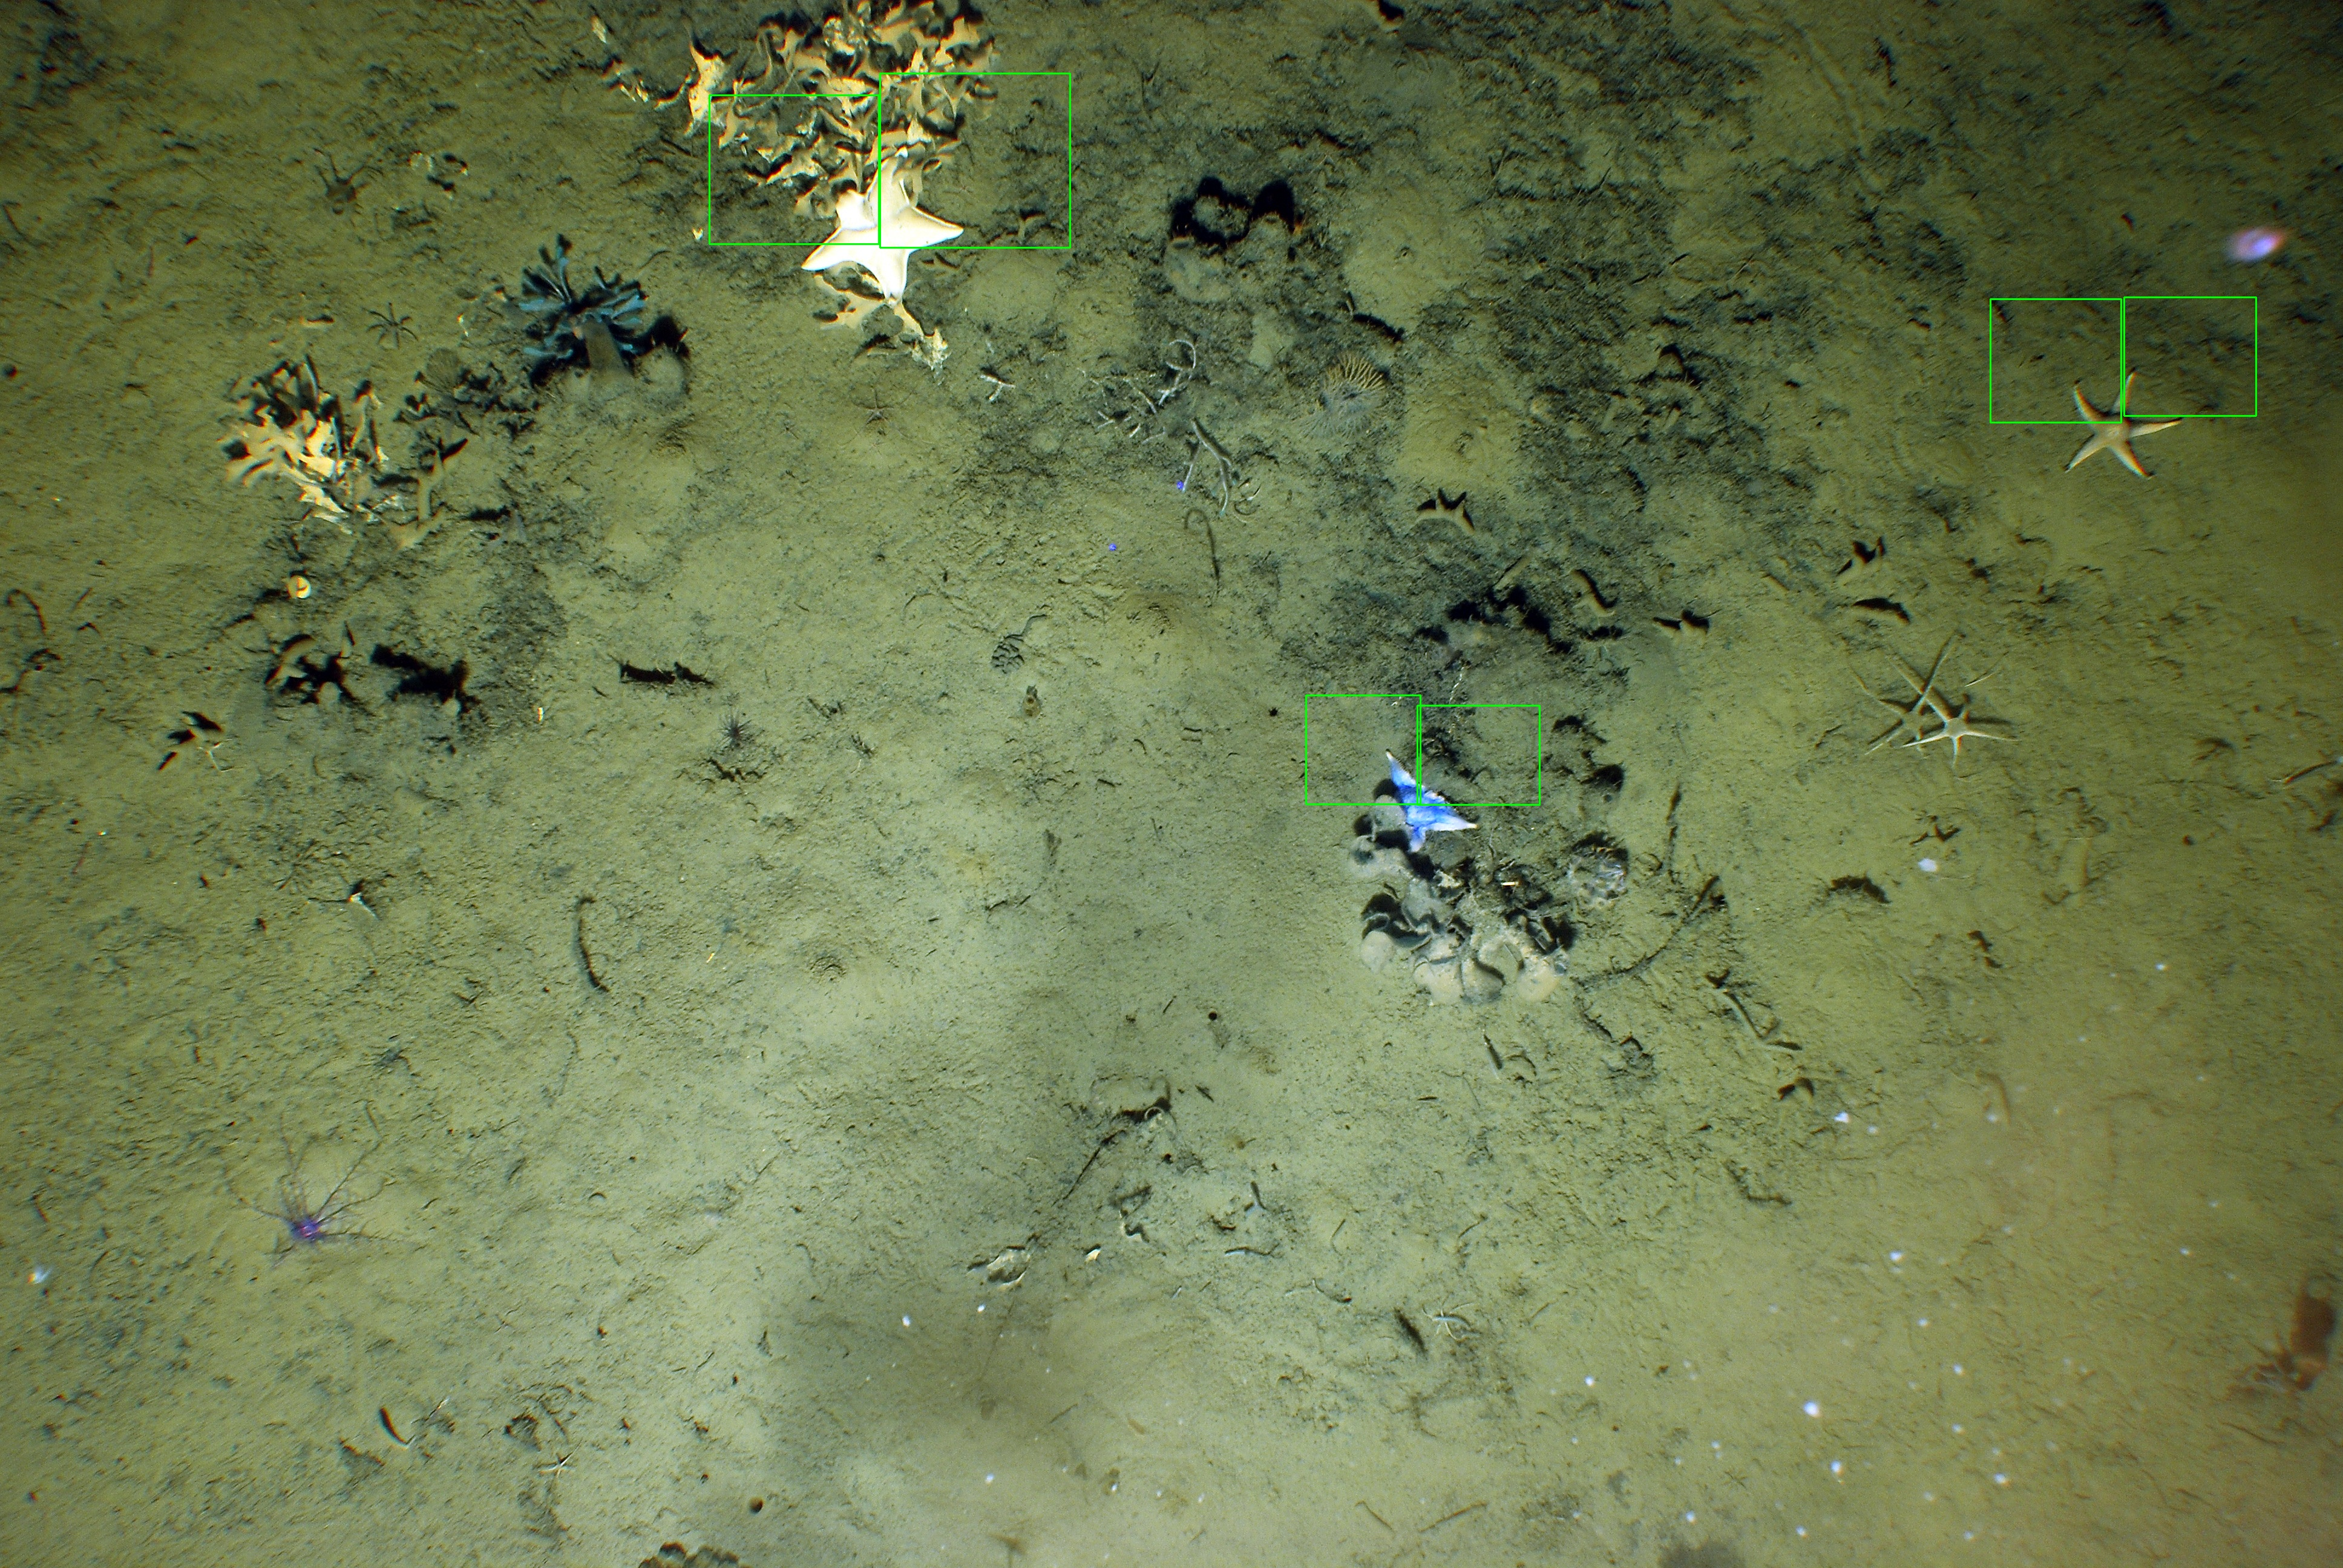

In [12]:
import cv2
from ultralytics.engine.results import Boxes
from IPython.display import display, Image

image = cv2.imread('DSC_0272.jpg')
prediction = model(image, imgsz=[512, 736], conf=0.1)

for bbox in prediction[0].boxes:
    x1, y1, x2, y2 = bbox.xyxy.cpu()[0].numpy()
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Convert the image to RGB format for displaying in the notebook
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes in the notebook
display(Image(data=cv2.imencode('.jpg', image_rgb)[1].tobytes()))